# EDA on Generated Queries

In [9]:
import sys

import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

sys.path.append('..')
import util.msutils

%matplotlib inline

In [4]:
# Get queries generated by 
query_path = 'all_queries7Jul.tsv'
queries = pd.read_table(query_path, delimiter='\t', names=['Doc', 'Pos', 'Query'])
print('Rows:', queries.shape[0])
queries.tail()

Rows: 1838720


,Doc,Pos,Query
1838715,D3092202,92,what is the benefit of gem ox
1838716,D3092202,92,what is the difference between gemcitabine and...
1838717,D3092202,92,can gem x treat kidney stones
1838718,D3092202,92,benefits of gem ox
1838719,D3092202,92,what is the difference between gem ox & gemcit...


In [5]:
# Get rid of final document (D3092202) because we don't know if the entire document was processed.
queries = queries[queries.Doc != 'D3092202']
print('Rows:', queries.shape[0])
queries.tail()

Rows: 1837790


,Doc,Pos,Query
1837785,D3313646,14,where is bellevue
1837786,D3313646,14,"where is bellevue, alabama"
1837787,D3313646,14,what is the nearest town to bellevue alabama
1837788,D3313646,14,where is bellevue lincoln in arizona
1837789,D3313646,14,which cities meet the standards referred to as...


In [6]:
qstats = (
    queries
    .groupby('Doc')
    .agg(
        passages=pd.NamedAgg('Pos', 'max'),
        queries=pd.NamedAgg('Query', 'count')
    )
)
# First passage is at position 0, so need to add 1 to get
#   number of passages
qstats.passages = qstats.passages + 1
qstats.head()

,passages,queries
Doc,,
D1000419,3,30
D1000675,25,250
D1000802,6,60
D1001,23,230
D1001083,2,20


In [7]:
# Number of Documents
print('No duplicate document IDs in table?', qstats.index.is_unique)
print(f'Number of Queries: {queries.shape[0]:,}')
print('Number of documents:', qstats.shape[0])
print(f'Average number of queries per document: {queries.shape[0]/qstats.shape[0]:.1f}')

No duplicate document IDs in table? True
Number of Queries: 1,837,790
Number of documents: 8534
Average number of queries per document: 215.3


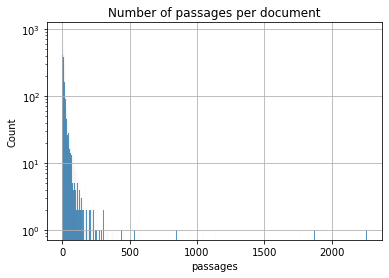

In [18]:
plt.figure()
sns.histplot(data=qstats, x='passages', log_scale=(False, True))
plt.title('Number of passages per document')
# plt.xticks(range(0, 3001, 250))
plt.grid()
plt.show()

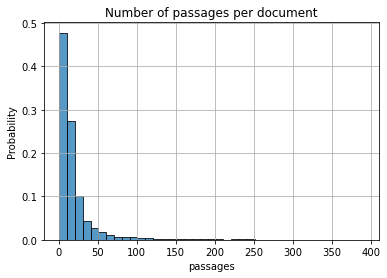

In [24]:
plt.figure()
sns.histplot(data=qstats[qstats.passages < 400],
             x='passages',
             binwidth=10,
             stat='probability'),
             # log_scale=(False, True))
plt.title('Number of passages per document')
plt.grid()
plt.show()

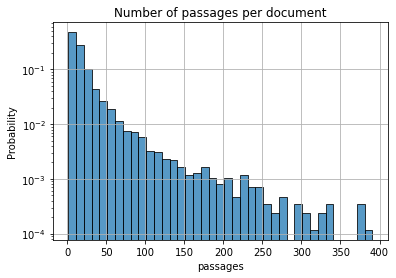

In [26]:
plt.figure()
sns.histplot(data=qstats[qstats.passages < 400],
             x='passages',
             binwidth=10,
             stat='probability',
             log_scale=(False, True))
plt.title('Number of passages per document')
plt.grid()
plt.show()

In [ ]:
doc_path = '/home/ubuntu/efs/data/msmarco_docs/msmarco-docs.tsv'
didx = util.msutils.DocIndex(doc_path)